In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
games = pd.read_csv("games.csv")
players = pd.read_csv("players.csv")
plays = pd.read_csv("plays.csv")

weeks = pd.DataFrame(columns=['gameId','playId','event','displayName','position','team',
                                              'playDirection','route','x','y','week'])
for weeknum in range(1,18):
    df = pd.read_csv(f"week{weeknum}.csv", usecols=['gameId','playId','event','nflId','displayName','position','team',
                                              'playDirection','route','x','y'])
    df['week'] = weeknum
    weeks = pd.concat([weeks,df],ignore_index=True)


In [3]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [4]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [5]:
plays.shape

(19239, 27)

In [6]:
plays['passResult'].value_counts()

C     11370
I      6135
S      1308
IN      420
R         4
Name: passResult, dtype: int64

In [7]:
games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [8]:
weeks = weeks.dropna()
weeks.drop(['x','y','position','team','week','nflId','event'],axis=1,inplace=True)
weeks.head()

,gameId,playId,displayName,playDirection,route
2,2018090600,75,Julio Jones,left,HITCH
4,2018090600,75,Mohamed Sanu,left,HITCH
10,2018090600,75,Austin Hooper,left,OUT
12,2018090600,75,Ricky Ortiz,left,FLAT
16,2018090600,75,Julio Jones,left,HITCH


In [9]:
weeks['Combo'] = weeks['gameId'].astype('str') + " " + weeks['playId'].astype('str') + " "  + " " + weeks['displayName'] + " "+ weeks['playDirection'] + " "+ weeks['route']  


weeks.shape


(5117955, 6)

In [10]:
weeks.drop_duplicates(subset=['Combo'],inplace=True)
weeks.shape

(78343, 6)

In [11]:
del weeks['Combo']
weeks.head()

,gameId,playId,displayName,playDirection,route
2,2018090600,75,Julio Jones,left,HITCH
4,2018090600,75,Mohamed Sanu,left,HITCH
10,2018090600,75,Austin Hooper,left,OUT
12,2018090600,75,Ricky Ortiz,left,FLAT
829,2018090600,146,Devonta Freeman,left,FLAT


In [12]:
plays_merged = pd.merge(plays,games, on = 'gameId',how = 'inner')

In [13]:
plays_merged.shape

(19239, 32)

In [14]:
merged_data = pd.merge(plays_merged,weeks, on = ['gameId','playId'],how = 'inner')
merged_data = merged_data.loc[merged_data.penaltyCodes.isna() == True]
#merged_data = merged_data.loc[merged_data.route.isna() == False]
#merged_data = merged_data.loc[merged_data.passResult == "C"]

name_df = merged_data.displayName.str.split(" ",expand=True)
name_df.columns = ['F','L','X']
name_df['player'] = name_df.F.str.slice(start=0, stop=1)+"."+ name_df.L
merged_data['player'] = name_df['player']

merged_data.drop(['displayName','yardlineSide','penaltyCodes',
                  'penaltyJerseyNumbers','epa','isDefensivePI','gameDate','gameTimeEastern','offensePlayResult'],
                 inplace=True, axis = 1)

#pass_outcome_caught = merged_data.loc[merged_data.event ==  'pass_outcome_caught']

idex_df = merged_data[merged_data.apply(lambda x: x.player in x.playDescription, axis=1)][['playDescription', 'player']]
idex = idex_df.index

pass_caught = merged_data[merged_data.index.isin(idex)]
pass_caught.drop(['playDescription','playType','gameId','playId'], inplace = True, axis = 1)

# Define Play Situation
conditions = [
    # 1st Down
    (pass_caught['down'] == 1) & (pass_caught['yardsToGo'] == 1),
    (pass_caught['down'] == 1) & (pass_caught['yardsToGo'] == 10),
    (pass_caught['down'] == 1) & ((pass_caught['yardsToGo'] > 1) & (pass_caught['yardsToGo'] <= 4)),
    (pass_caught['down'] == 1) & ((pass_caught['yardsToGo'] > 4) & (pass_caught['yardsToGo'] <= 9 )),
    (pass_caught['down'] == 1) & ((pass_caught['yardsToGo'] > 10) & (pass_caught['yardsToGo'] <= 20 )),
    (pass_caught['down'] == 1) & (pass_caught['yardsToGo'] > 20),
    # 2nd Down
    (pass_caught['down'] == 2) & (pass_caught['yardsToGo'] == 1),
    (pass_caught['down'] == 2) & ((pass_caught['yardsToGo'] > 1) & (pass_caught['yardsToGo'] <= 3)),
    (pass_caught['down'] == 2) & ((pass_caught['yardsToGo'] > 3) & (pass_caught['yardsToGo'] <= 10 )),
    (pass_caught['down'] == 2) & ((pass_caught['yardsToGo'] > 10) & (pass_caught['yardsToGo'] <= 20 )),
    (pass_caught['down'] == 2) & (pass_caught['yardsToGo'] > 20),
    # 3rd Down
    (pass_caught['down'] == 3) & (pass_caught['yardsToGo'] == 1),
    (pass_caught['down'] == 3) & ((pass_caught['yardsToGo'] > 1) & (pass_caught['yardsToGo'] <= 3)),
    (pass_caught['down'] == 3) & ((pass_caught['yardsToGo'] > 3) & (pass_caught['yardsToGo'] <= 10 )),
    (pass_caught['down'] == 3) & ((pass_caught['yardsToGo'] > 10) & (pass_caught['yardsToGo'] <= 20 )),
    (pass_caught['down'] == 3) & (pass_caught['yardsToGo'] > 20),
    # 4th Down
    (pass_caught['down'] == 4) & (pass_caught['yardsToGo'] == 1),
    (pass_caught['down'] == 4) & ((pass_caught['yardsToGo'] > 1) & (pass_caught['yardsToGo'] <= 3)),
    (pass_caught['down'] == 4) & ((pass_caught['yardsToGo'] > 3) & (pass_caught['yardsToGo'] <= 10 )),
    (pass_caught['down'] == 4) & ((pass_caught['yardsToGo'] > 10) & (pass_caught['yardsToGo'] <= 20 )),
    (pass_caught['down'] == 4) & (pass_caught['yardsToGo'] > 20)]

    
choices = ['1st & 1', '1st & 10', '1st & Short', '1st & Mid','1st & Long','1st & Forever',
           '2nd & 1','2nd & Short','2nd & Mid','2nd & Long','2nd & Forever',
           '3rd & 1','3rd & Short','3rd & Mid','3rd & Long','3rd & Forever',
           '4th & 1','4th & Short','4th & Mid','4th & Long','4th & Forever']

pass_caught['Situation'] = np.select(conditions, choices, default='UNK')

# Determine Success or Failure
conditions = [
    (pass_caught['passResult'] == "I"),
    # 1st Down Success 
    (pass_caught['down'] == 1) & (pass_caught['Situation'] == '1st & 10') & (pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    (pass_caught['down'] == 1) & (pass_caught['Situation'] == '1st & 1') &(pass_caught['playResult'] > pass_caught['yardsToGo']),
    (pass_caught['down'] == 1) & (pass_caught['Situation'] == '1st & Forever') &( pass_caught['playResult'] > pass_caught['yardsToGo']*0.75),
    (pass_caught['down'] == 1) & (pass_caught['Situation'] == '1st & Long') &( pass_caught['playResult'] > pass_caught['yardsToGo']*0.60),
    (pass_caught['down'] == 1) & (pass_caught['Situation'] == '1st & Short') &( pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    (pass_caught['down'] == 1) & (pass_caught['Situation'] == '1st & Mid') &( pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    # 2nd Down Success
    (pass_caught['down'] == 2) & (pass_caught['Situation'] == '2nd & 10') & (pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    (pass_caught['down'] == 2) & (pass_caught['Situation'] == '2nd & 1') &(pass_caught['playResult'] > pass_caught['yardsToGo']),
    (pass_caught['down'] == 2) & (pass_caught['Situation'] == '2nd & Forever') &( pass_caught['playResult'] > pass_caught['yardsToGo']*0.75),
    (pass_caught['down'] == 2) & (pass_caught['Situation'] == '2nd & Long') &( pass_caught['playResult'] > pass_caught['yardsToGo']*0.60),
    (pass_caught['down'] == 2) & (pass_caught['Situation'] == '2nd & Short') &( pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    (pass_caught['down'] == 2) & (pass_caught['Situation'] == '2nd & Mid') &( pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    # 3rd Down Success
    (pass_caught['down'] == 3) & (pass_caught['Situation'] == '3rd & 10') & (pass_caught['playResult'] > pass_caught['yardsToGo']*80),
    (pass_caught['down'] == 3) & (pass_caught['Situation'] == '3rd & 1') &(pass_caught['playResult'] > pass_caught['yardsToGo']),
    (pass_caught['down'] == 3) & (pass_caught['Situation'] == '3rd & Forever') &( pass_caught['playResult'] > pass_caught['yardsToGo']*0.95),
    (pass_caught['down'] == 3) & (pass_caught['Situation'] == '3rd & Long') &( pass_caught['playResult'] > pass_caught['yardsToGo']*0.90),
    (pass_caught['down'] == 3) & (pass_caught['Situation'] == '3rd & Short') &( pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    (pass_caught['down'] == 3) & (pass_caught['Situation'] == '3rd & Mid') &( pass_caught['playResult'] > pass_caught['yardsToGo']/2),
    # 4th Down Success
    (pass_caught['down'] == 4) &( pass_caught['playResult'] > pass_caught['yardsToGo'])]
    
Success = ['Failure','Success','Success','Success','Success','Success','Success','Success','Success','Success','Success',
          'Success','Success','Success','Success','Success','Success','Success','Success','Success']

pass_caught['PlaySuccess'] = np.select(conditions, Success, default='Failure')

play_result = list(pass_caught.playResult)

del pass_caught['playResult']

pass_caught['playResult'] = play_result

pass_caught.head()


/Users/timhulak/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-14-f9a8e24fd5c8>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_caught['Situation'] = np.select(conditions, choices, default='UNK')
<ipython-input-14-f9a8e24fd5c8>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,quarter,down,yardsToGo,possessionTeam,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,homeTeamAbbr,visitorTeamAbbr,week,playDirection,route,player,Situation,PlaySuccess,playResult
0,1,1,15,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,C,PHI,ATL,1,left,HITCH,J.Jones,1st & Long,Success,10
8,1,1,10,ATL,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,I,PHI,ATL,1,left,HITCH,C.Ridley,1st & 10,Failure,0
11,1,2,10,ATL,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,I,PHI,ATL,1,left,SCREEN,D.Freeman,2nd & Mid,Failure,0
14,1,3,10,ATL,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,C,PHI,ATL,1,left,CORNER,J.Jones,3rd & Mid,Success,33
17,1,3,1,ATL,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,I,PHI,ATL,1,left,OUT,D.Freeman,3rd & 1,Failure,0


In [15]:
pass_caught.shape

(16289, 25)

# Exploration of SF and divisional opponents 

In [16]:
SF_plays = pass_caught.loc[(pass_caught.possessionTeam == "SF")] #&(pass_caught.passResult == "C")]
SEA_plays = pass_caught.loc[(pass_caught.possessionTeam == "SEA")] #&(pass_caught.passResult == "C")]
LA_plays = pass_caught.loc[(pass_caught.possessionTeam == "LA")] #&(pass_caught.passResult == "C")]
ARI_plays = pass_caught.loc[(pass_caught.possessionTeam == "ARI")] #&(pass_caught.passResult == "C")]

## San Francisco

In [17]:
SF_plays.head()

,quarter,down,yardsToGo,possessionTeam,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,homeTeamAbbr,visitorTeamAbbr,week,playDirection,route,player,Situation,PlaySuccess,playResult
7638,1,1,10,SF,50,I_FORM,"2 RB, 1 TE, 2 WR",7.0,6.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0.0,0.0,09:21:00,60.0,C,SF,DET,2,left,OUT,D.Pettis,1st & 10,Success,35
7663,1,2,1,SF,21,EMPTY,"2 RB, 1 TE, 2 WR",7.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,3.0,02:19:00,89.0,C,SF,DET,2,left,HITCH,M.Breida,2nd & 1,Success,4
7667,1,1,10,SF,25,SINGLEBACK,"2 RB, 1 TE, 2 WR",6.0,2.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,3.0,01:50:00,85.0,I,SF,DET,2,left,SLANT,G.Kittle,1st & 10,Failure,0
7669,1,2,10,SF,25,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,3.0,01:47:00,85.0,C,SF,DET,2,left,HITCH,K.Juszczyk,2nd & Mid,Success,9
7674,1,1,10,SF,40,EMPTY,"2 RB, 1 TE, 2 WR",7.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,3.0,01:00:00,70.0,C,SF,DET,2,left,HITCH,A.Morris,1st & 10,Success,16


In [18]:
SF_plays.describe()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,week,playResult
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,467.000000,467.000000,467.000000,468.000000,468.000000
mean,2.572650,1.858974,8.952991,29.059829,6.143162,4.279915,10.591006,14.372591,63.301927,9.476496,8.087607
std,1.111098,0.815656,3.701659,12.614896,1.060694,0.758014,8.938378,12.002429,24.233061,4.764865,11.450238
min,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,12.000000,2.000000,-2.000000
25%,2.000000,1.000000,7.000000,21.000000,6.000000,4.000000,3.000000,6.000000,42.500000,5.000000,0.000000
50%,2.000000,2.000000,10.000000,28.500000,6.000000,4.000000,10.000000,12.000000,64.000000,9.000000,5.000000
75%,4.000000,2.250000,10.000000,40.000000,7.000000,5.000000,15.000000,21.000000,84.000000,14.000000,12.000000
max,4.000000,4.000000,26.000000,50.000000,10.000000,7.000000,39.000000,48.000000,109.000000,17.000000,85.000000


In [19]:
pd.pivot_table(SF_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0,
               margins=True)

personnelD,"0 DL, 4 LB, 7 DB","0 DL, 5 LB, 6 DB","1 DL, 4 LB, 6 DB","2 DL, 3 LB, 6 DB","2 DL, 4 LB, 5 DB","3 DL, 1 LB, 7 DB","3 DL, 2 LB, 6 DB","3 DL, 3 LB, 5 DB","3 DL, 4 LB, 4 DB","4 DL, 1 LB, 6 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB","5 DL, 2 LB, 4 DB","5 DL, 3 LB, 2 DB, 1 OL",All
personnelO,,,,,,,,,,,,,,,
"0 RB, 1 TE, 4 WR",0,0,0,0,0,0,0,26,0,13,0,0,0,0,39
"1 RB, 1 TE, 3 WR",12,9,3,149,61,34,175,255,4,280,494,29,0,0,1505
"1 RB, 2 TE, 2 WR",0,0,0,0,22,0,0,38,64,0,36,263,1,0,424
"1 RB, 3 TE, 1 WR",0,0,0,0,11,0,0,0,0,0,0,0,0,0,11
"2 RB, 1 TE, 2 WR",0,0,0,0,79,0,0,205,225,0,118,1005,31,0,1663
"2 RB, 2 TE, 1 WR",0,0,0,0,0,0,0,0,0,0,0,143,0,0,143
"2 RB, 3 TE, 0 WR",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
All,12,9,3,149,173,34,175,524,293,293,648,1440,32,0,3785


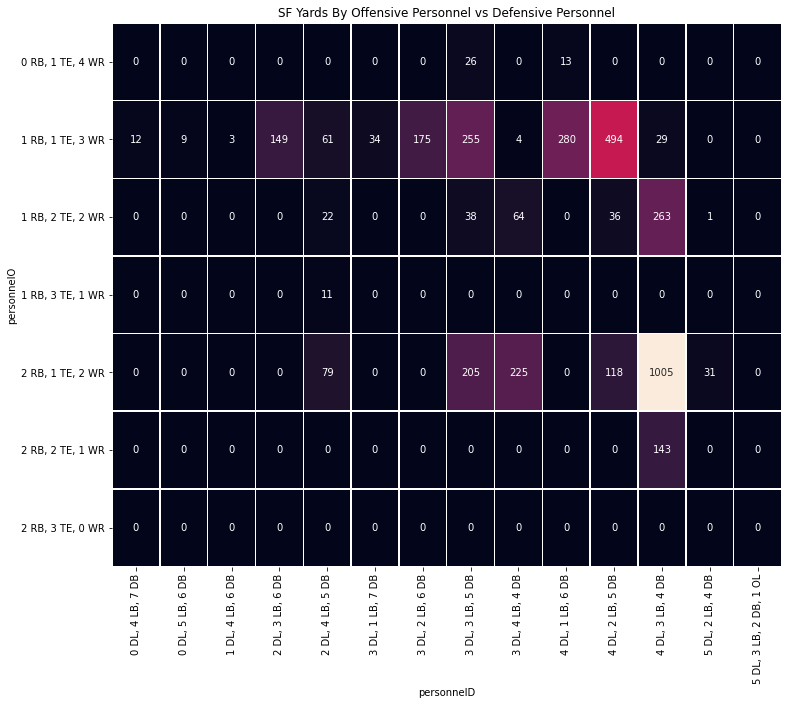

In [20]:
SF_offense_yards= pd.pivot_table(SF_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(SF_offense_yards,
            annot=True,
            linewidths=.5,
            fmt="d",
            cbar=False)
plt.yticks(rotation = 360)
plt.title("SF Yards By Offensive Personnel vs Defensive Personnel")
plt.show()

# Seattle 

In [21]:
SEA_plays.head()

,quarter,down,yardsToGo,possessionTeam,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,homeTeamAbbr,visitorTeamAbbr,week,playDirection,route,player,Situation,PlaySuccess,playResult
9228,1,2,8,SEA,38,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,13:24:00,48.0,I,CHI,SEA,2,right,ANGLE,R.Penny,2nd & Mid,Failure,0
9231,1,3,8,SEA,38,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,13:20:00,48.0,C,CHI,SEA,2,right,HITCH,J.Brown,3rd & Mid,Success,10
9238,1,1,10,SEA,48,I_FORM,"2 RB, 1 TE, 2 WR",8.0,5.0,"4 DL, 3 LB, 4 DB",SCRAMBLE,0.0,0.0,12:51:00,58.0,C,CHI,SEA,2,right,CROSS,W.Dissly,1st & 10,Success,6
9271,1,1,10,SEA,25,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,7.0,04:55:00,35.0,C,CHI,SEA,2,right,HITCH,B.Marshall,1st & 10,Success,10
9276,1,2,6,SEA,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,7.0,03:42:00,49.0,I,CHI,SEA,2,right,SLANT,B.Marshall,2nd & Mid,Failure,0


In [22]:
SEA_plays.describe()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,week,playResult
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,2.606232,1.980170,9.084986,30.192635,6.138810,4.305949,11.402266,11.821530,62.373938,9.402266,8.742210
std,1.125967,0.834043,4.179037,12.491008,0.994585,0.777813,9.012125,9.893719,23.319949,4.793129,10.739628
min,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,11.000000,2.000000,-5.000000
25%,2.000000,1.000000,6.000000,23.000000,6.000000,4.000000,3.000000,3.000000,45.000000,5.000000,0.000000
50%,3.000000,2.000000,10.000000,31.000000,6.000000,4.000000,10.000000,10.000000,62.000000,10.000000,6.000000
75%,4.000000,3.000000,10.000000,40.000000,7.000000,5.000000,19.000000,17.000000,80.000000,13.000000,12.000000
max,5.000000,4.000000,28.000000,50.000000,8.000000,7.000000,33.000000,36.000000,109.000000,17.000000,54.000000


In [23]:
pd.pivot_table(SEA_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0, margins=True)

personnelD,"1 DL, 3 LB, 7 DB","1 DL, 4 LB, 6 DB","2 DL, 3 LB, 6 DB","2 DL, 4 LB, 5 DB","3 DL, 2 LB, 6 DB","3 DL, 3 LB, 5 DB","3 DL, 4 LB, 4 DB","4 DL, 1 LB, 6 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB","4 DL, 4 LB, 3 DB","5 DL, 2 LB, 4 DB",All
personnelO,,,,,,,,,,,,,
"0 RB, 1 TE, 4 WR",0,0,0,0,0,12,0,0,23,0,0,0,35
"1 RB, 0 TE, 4 WR",0,0,15,0,5,0,0,0,0,0,0,0,20
"1 RB, 1 TE, 3 WR",27,20,159,130,172,628,9,153,914,78,0,0,2290
"1 RB, 2 TE, 2 WR",0,0,0,17,0,0,41,0,10,236,0,0,304
"2 RB, 0 TE, 3 WR",0,0,0,0,0,0,0,0,10,0,0,0,10
"2 RB, 1 TE, 2 WR",0,0,0,0,0,0,9,0,18,48,0,0,75
"6 OL, 1 RB, 0 TE, 3 WR",0,0,0,-2,0,0,45,19,3,38,0,0,103
"6 OL, 1 RB, 1 TE, 2 WR",0,0,0,2,0,0,115,0,6,42,0,0,165
"6 OL, 1 RB, 2 TE, 1 WR",0,0,0,0,0,0,5,0,0,25,0,0,30


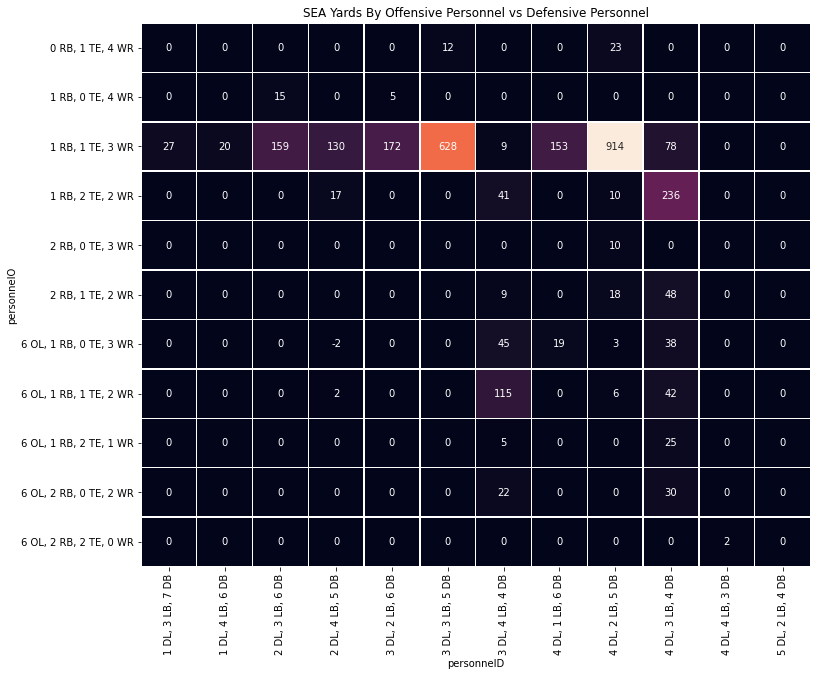

In [24]:
SEA_offense_yards= pd.pivot_table(SEA_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(SEA_offense_yards,
            annot=True,
            linewidths=.5,
            fmt="d",
            cbar=False)
plt.yticks(rotation = 360)
plt.title("SEA Yards By Offensive Personnel vs Defensive Personnel")
plt.show()

## Arizona

In [25]:
ARI_plays.head()

,quarter,down,yardsToGo,possessionTeam,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,homeTeamAbbr,visitorTeamAbbr,week,playDirection,route,player,Situation,PlaySuccess,playResult
2697,1,1,10,ARI,20,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,4.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0.0,0.0,08:54:00,30.0,I,ARI,WAS,1,right,HITCH,C.Williams,1st & 10,Failure,0
2700,1,2,9,ARI,32,EMPTY,"1 RB, 1 TE, 3 WR",6.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0.0,0.0,07:20:00,42.0,C,ARI,WAS,1,right,OUT,D.Johnson,2nd & Mid,Failure,4
2707,1,3,5,ARI,36,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,6.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0.0,0.0,06:38:00,46.0,C,ARI,WAS,1,right,SLANT,C.Kirk,3rd & Mid,Success,4
2723,2,1,10,ARI,25,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,0.0,14:54:00,85.0,C,ARI,WAS,1,left,CROSS,L.Fitzgerald,1st & 10,Failure,3
2730,2,3,7,ARI,28,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,6.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,0.0,13:32:00,82.0,I,ARI,WAS,1,left,OUT,R.Seals-Jones,3rd & Mid,Failure,0


In [26]:
ARI_plays.describe()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,week,playResult
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,2.695842,1.934354,9.164114,30.382932,5.936543,4.155361,11.153173,10.411379,59.708972,9.096280,6.039387
std,1.155386,0.858434,3.702385,11.802838,1.054605,0.829777,9.745138,10.554024,22.910595,5.158404,8.931917
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,11.000000,1.000000,-6.000000
25%,2.000000,1.000000,7.000000,23.000000,5.000000,4.000000,3.000000,0.000000,40.000000,5.000000,0.000000
50%,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,10.000000,9.000000,60.000000,8.000000,3.000000
75%,4.000000,3.000000,10.000000,40.000000,7.000000,4.000000,16.000000,14.000000,79.000000,14.000000,9.000000
max,4.000000,4.000000,28.000000,50.000000,10.000000,8.000000,45.000000,45.000000,106.000000,17.000000,75.000000


In [27]:
pd.pivot_table(ARI_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0,margins = True)

personnelD,"1 DL, 3 LB, 7 DB","1 DL, 4 LB, 6 DB","2 DL, 2 LB, 7 DB","2 DL, 3 LB, 6 DB","2 DL, 4 LB, 5 DB","3 DL, 2 LB, 6 DB","3 DL, 3 LB, 5 DB","3 DL, 4 LB, 4 DB","4 DL, 1 LB, 6 DB","4 DL, 2 LB, 4 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB","5 DL, 1 LB, 5 DB","5 DL, 2 LB, 4 DB","5 DL, 3 LB, 3 DB","6 DL, 1 LB, 4 DB",All
personnelO,,,,,,,,,,,,,,,,,
"1 RB, 1 TE, 3 WR",60,0,21,117,246,301,365,16,110,0,683,81,39,11,0,0,2050
"1 RB, 2 TE, 2 WR",0,0,0,0,0,4,4,27,0,0,18,375,0,29,0,0,457
"1 RB, 3 TE, 1 WR",0,0,0,0,0,0,0,0,17,0,0,79,0,0,0,35,131
"2 RB, 0 TE, 3 WR",0,0,0,0,0,11,3,0,0,0,0,0,0,0,0,0,14
"2 RB, 1 TE, 2 WR",0,0,0,0,0,0,6,8,0,0,31,46,0,13,0,0,104
"2 RB, 2 TE, 1 WR",0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4
"2 RB, 3 TE, 0 WR",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
All,60,0,21,117,246,316,378,51,127,0,732,585,39,53,0,35,2760


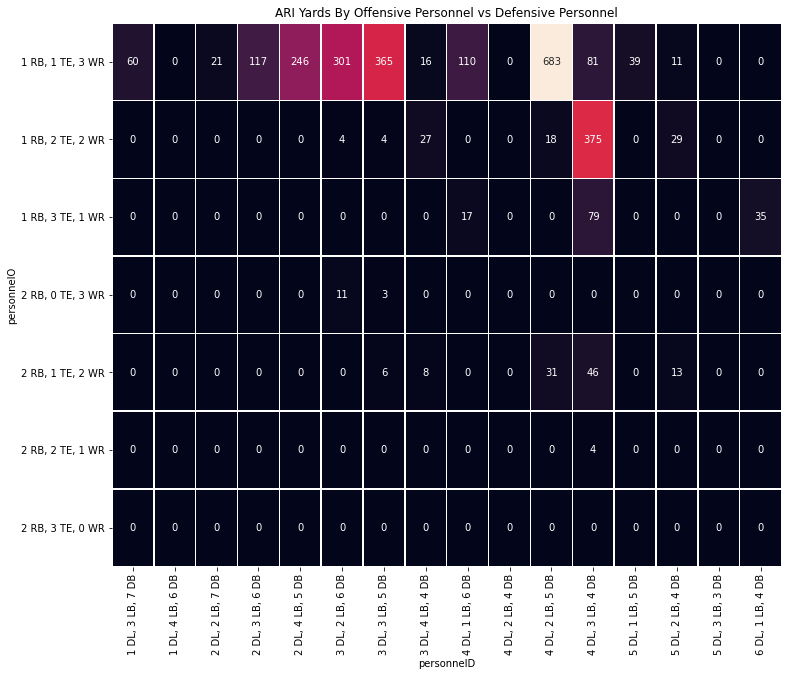

In [28]:
ARI_offense_yards= pd.pivot_table(ARI_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(ARI_offense_yards,
            annot=True,
            linewidths=.5,
            fmt="d",
            cbar=False)
plt.yticks(rotation = 360)
plt.title("ARI Yards By Offensive Personnel vs Defensive Personnel")
plt.show()

## Los Angeles

In [29]:
LA_plays.head()

,quarter,down,yardsToGo,possessionTeam,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,homeTeamAbbr,visitorTeamAbbr,week,playDirection,route,player,Situation,PlaySuccess,playResult
3901,1,3,2,LA,33,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,7.0,08:52:00,77.0,I,OAK,LA,1,left,HITCH,B.Cooks,3rd & Short,Failure,0
3916,1,1,10,LA,50,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,7.0,06:07:00,60.0,I,OAK,LA,1,left,CROSS,C.Kupp,1st & 10,Failure,0
3921,1,2,10,LA,50,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,7.0,06:01:00,60.0,C,OAK,LA,1,left,HITCH,C.Kupp,2nd & Mid,Success,11
3922,1,1,10,LA,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,7.0,05:37:00,49.0,C,OAK,LA,1,left,OUT,R.Woods,1st & 10,Success,20
3928,1,1,10,LA,19,EMPTY,"1 RB, 1 TE, 3 WR",6.0,3.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,7.0,04:59:00,29.0,C,OAK,LA,1,left,CROSS,T.Gurley,1st & 10,Success,19


In [30]:
LA_plays.describe()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,week,playResult
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.00000
mean,2.492453,1.832075,8.779245,30.022642,5.913208,4.213208,13.492453,14.250943,61.150943,9.020755,8.50566
std,1.096885,0.787490,3.835752,12.569935,0.985728,0.850784,11.242008,12.427759,23.590790,4.906839,10.21031
min,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,12.000000,1.000000,-6.00000
25%,2.000000,1.000000,7.000000,20.250000,5.000000,4.000000,3.750000,3.000000,42.000000,5.000000,0.00000
50%,2.000000,2.000000,10.000000,32.000000,6.000000,4.000000,13.000000,13.000000,64.000000,9.000000,6.00000
75%,3.000000,2.000000,10.000000,41.000000,6.000000,5.000000,20.000000,21.000000,79.750000,14.000000,13.00000
max,4.000000,4.000000,30.000000,50.000000,8.000000,7.000000,51.000000,54.000000,109.000000,17.000000,70.00000


In [31]:
pd.pivot_table(LA_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0,margins=True)

personnelD,"2 DL, 2 LB, 7 DB","2 DL, 3 LB, 6 DB","2 DL, 4 LB, 5 DB","3 DL, 1 LB, 7 DB","3 DL, 2 LB, 6 DB","3 DL, 3 LB, 5 DB","3 DL, 4 LB, 4 DB","4 DL, 1 LB, 6 DB","4 DL, 2 LB, 5 DB","4 DL, 3 LB, 4 DB","5 DL, 2 LB, 4 DB",All
personnelO,,,,,,,,,,,,
"0 RB, 1 TE, 4 WR",0,0,0,0,0,0,0,0,0,0,0,0
"1 RB, 1 TE, 3 WR",9,342,119,0,249,451,0,274,2784,109,29,4366
"1 RB, 2 TE, 2 WR",0,0,0,0,0,0,0,0,106,0,5,111
"1 RB, 3 TE, 1 WR",0,0,0,0,0,0,0,0,0,31,0,31
All,9,342,119,0,249,451,0,274,2890,140,34,4508


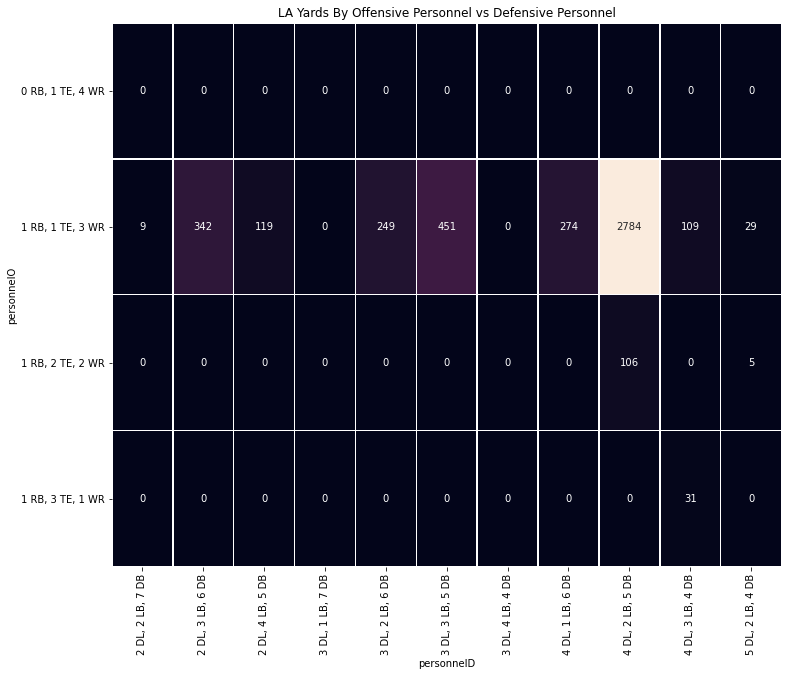

In [32]:
LA_offense_yards= pd.pivot_table(LA_plays, 
               values='playResult',
               index='personnelO',
               columns='personnelD',
               aggfunc=sum,
               fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(LA_offense_yards,
            annot=True,
            linewidths=.5,
            fmt="d",
            cbar=False)
plt.yticks(rotation = 360)
plt.title("LA Yards By Offensive Personnel vs Defensive Personnel")
plt.show()

## EDA

In [33]:
for i in (pass_caught.route.unique()):
    print(i)


HITCH
SCREEN
CORNER
OUT
FLAT
IN
POST
CROSS
ANGLE
GO
SLANT
WHEEL
undefined


In [34]:
for i in sorted(list(pass_caught.Situation.unique())):
    print(i)

1st & 1
1st & 10
1st & Forever
1st & Long
1st & Mid
1st & Short
2nd & 1
2nd & Forever
2nd & Long
2nd & Mid
2nd & Short
3rd & 1
3rd & Forever
3rd & Long
3rd & Mid
3rd & Short
4th & 1
4th & Forever
4th & Long
4th & Mid
4th & Short


## Records
SF vs. SEA (1976 - 2021): Games: 47, Record: 17-30 (36.2%)

SF vs. LA (1950 - 2021): Games: 144, Record: 74-67-3 (51.3%)

SF vs. ARI (1951 - 2021): Games: 61, Record: 32-29 (52.5%)

Division: Games: 252, Record: 123-126-3 (48.8%)

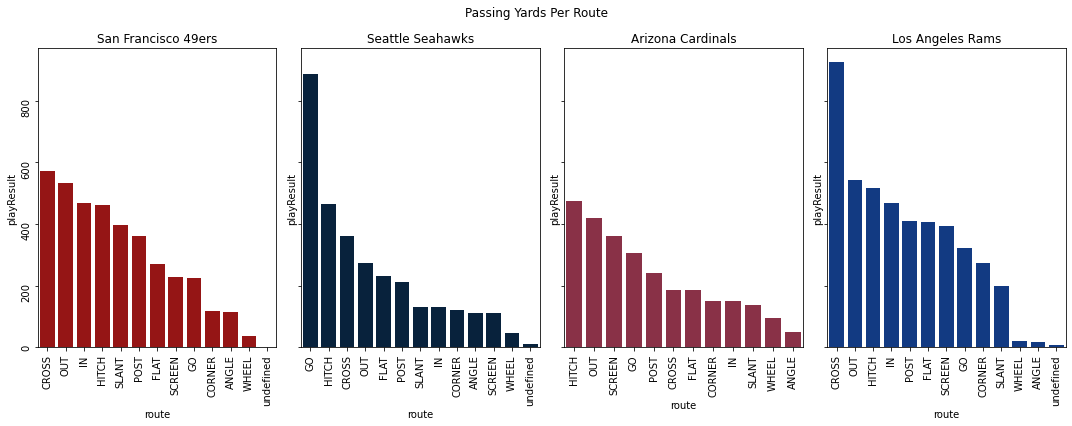

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
fig.suptitle('Passing Yards Per Route')

# SF
SF_barplot = SF_plays[['route','playResult']]
SF_barplot = SF_barplot.groupby('route',as_index=False).sum()
sns.barplot(ax=axes[0], x='route', y='playResult',data=SF_barplot.sort_values(by='playResult',ascending=False),ci=None,color = '#AA0000')
axes[0].set_title('San Francisco 49ers')
axes[0].tick_params(labelrotation=90)

# SEA
SEA_barplot = SEA_plays[['route','playResult']]
SEA_barplot = SEA_barplot.groupby('route',as_index=False).sum()
sns.barplot(ax=axes[1], x='route', y='playResult',data=SEA_barplot.sort_values(by='playResult',ascending=False),ci=None,color='#002244')
axes[1].set_title('Seattle Seahawks')
axes[1].tick_params(labelrotation=90)

# ARI
ARI_barplot = ARI_plays[['route','playResult']]
ARI_barplot = ARI_barplot.groupby('route',as_index=False).sum()
sns.barplot(ax=axes[2],x='route', y='playResult',data=ARI_barplot.sort_values(by='playResult',ascending=False),ci=None,color='#97233F')
axes[2].set_title('Arizona Cardinals')
axes[2].tick_params(labelrotation=90)

# LA
LA_barplot = LA_plays[['route','playResult']]
LA_barplot = LA_barplot.groupby('route',as_index=False).sum()
sns.barplot(ax=axes[3], x='route', y='playResult',data=LA_barplot.sort_values(by='playResult',ascending=False),ci=None,color='#003594')
axes[3].set_title('Los Angeles Rams')
axes[3].tick_params(labelrotation=90)

plt.tight_layout()

plt.show()

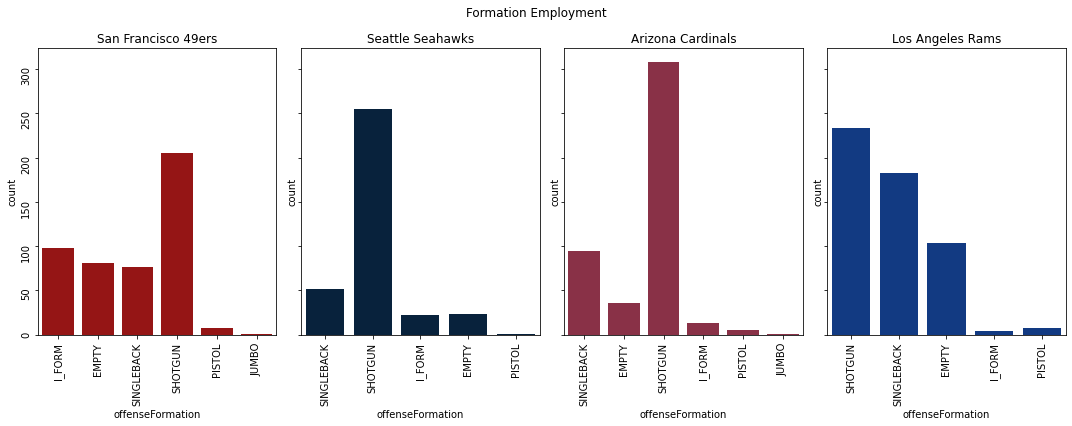

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
fig.suptitle('Formation Employment')

# SF
sns.countplot(ax=axes[0], x = 'offenseFormation',data=SF_plays,color = '#AA0000')
axes[0].set_title('San Francisco 49ers')
axes[0].tick_params(labelrotation=90)

# SEA
sns.countplot(ax=axes[1], x = 'offenseFormation',data=SEA_plays,color='#002244')
axes[1].set_title('Seattle Seahawks')
axes[1].tick_params(labelrotation=90)

# ARI
sns.countplot(ax=axes[2], x = 'offenseFormation',data=ARI_plays,color='#97233F')
axes[2].set_title('Arizona Cardinals')
axes[2].tick_params(labelrotation=90)

# LA
sns.countplot(ax=axes[3], x = 'offenseFormation',data=LA_plays,color='#003594')
axes[3].set_title('Los Angeles Rams')
axes[3].tick_params(labelrotation=90)

plt.tight_layout()

plt.show()

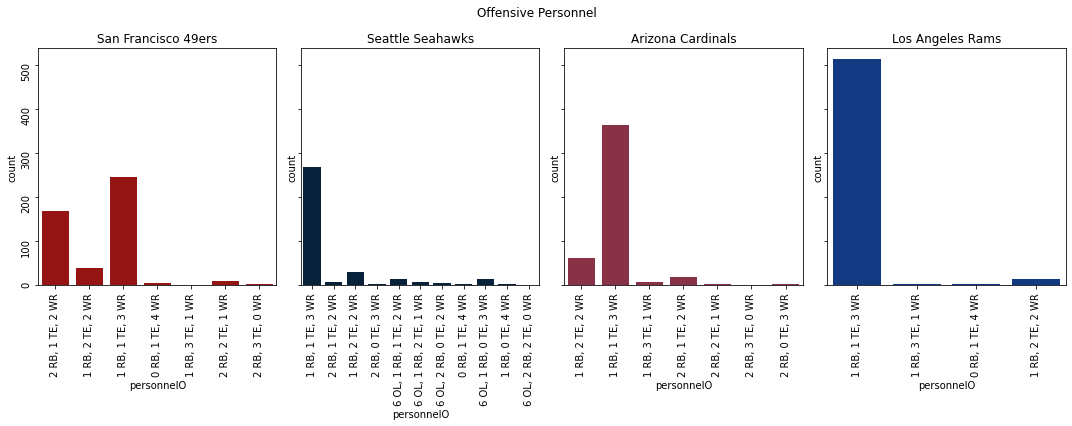

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
fig.suptitle('Offensive Personnel')

# SF
sns.countplot(ax=axes[0], x = 'personnelO',data=SF_plays,color = '#AA0000')
axes[0].set_title('San Francisco 49ers')
axes[0].tick_params(labelrotation=90)

# SEA
sns.countplot(ax=axes[1], x = 'personnelO',data=SEA_plays,color='#002244')
axes[1].set_title('Seattle Seahawks')
axes[1].tick_params(labelrotation=90)

# ARI
sns.countplot(ax=axes[2], x = 'personnelO',data=ARI_plays,color='#97233F')
axes[2].set_title('Arizona Cardinals')
axes[2].tick_params(labelrotation=90)

# LA
sns.countplot(ax=axes[3], x = 'personnelO',data=LA_plays,color='#003594')
axes[3].set_title('Los Angeles Rams')
axes[3].tick_params(labelrotation=90)

plt.tight_layout()

plt.show()

## Modeling

Neaural Net, Logistic regression, svm, reccomend top 3 plays based on situation?

Want to Perdict:

- Compelte pass vs incomplete pass
- Yardage
- Success/Failure
- Oppponant offensive personnel in a situation

In [38]:
pass_caught.head()

,quarter,down,yardsToGo,possessionTeam,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,homeTeamAbbr,visitorTeamAbbr,week,playDirection,route,player,Situation,PlaySuccess,playResult
0,1,1,15,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,C,PHI,ATL,1,left,HITCH,J.Jones,1st & Long,Success,10
8,1,1,10,ATL,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,I,PHI,ATL,1,left,HITCH,C.Ridley,1st & 10,Failure,0
11,1,2,10,ATL,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,I,PHI,ATL,1,left,SCREEN,D.Freeman,2nd & Mid,Failure,0
14,1,3,10,ATL,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,C,PHI,ATL,1,left,CORNER,J.Jones,3rd & Mid,Success,33
17,1,3,1,ATL,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,I,PHI,ATL,1,left,OUT,D.Freeman,3rd & 1,Failure,0


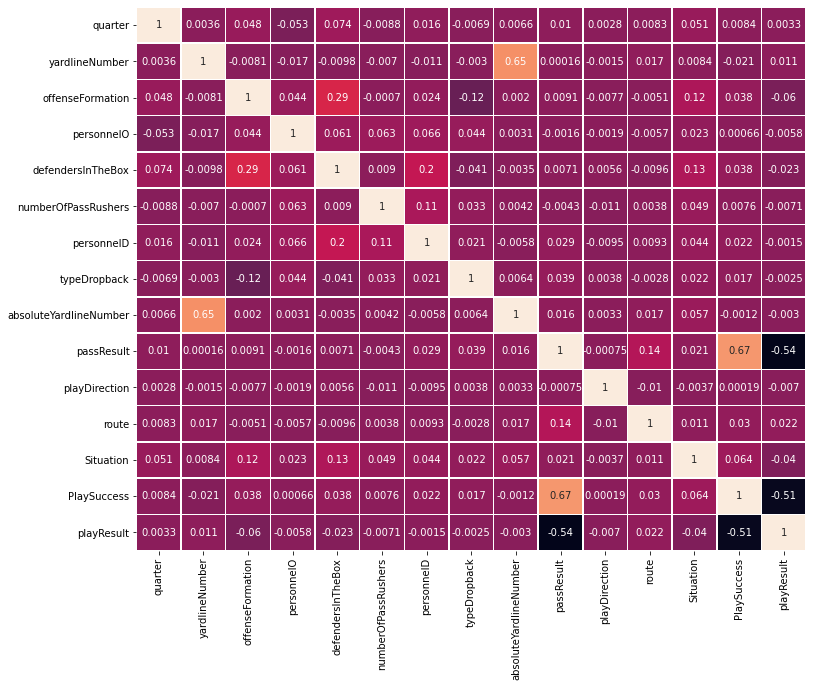

In [39]:
model_data = pass_caught[['quarter', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'absoluteYardlineNumber', 'passResult', 'playDirection', 'route', 
        'Situation', 'PlaySuccess', 'playResult']]
plt.figure(figsize=(12,10))
sns.heatmap(model_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),
            annot=True,
            linewidths=.5,
            cbar=False)
plt.show()

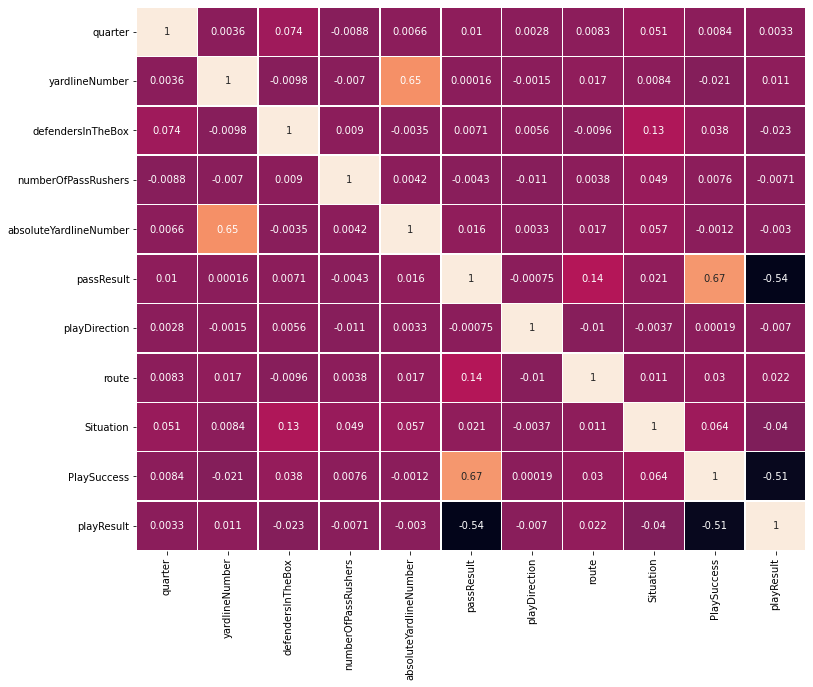

In [40]:
model_data = pass_caught[['quarter', 'yardlineNumber',
       'defendersInTheBox','numberOfPassRushers', 'absoluteYardlineNumber', 'passResult', 'playDirection', 'route', 
        'Situation', 'PlaySuccess', 'playResult']]
plt.figure(figsize=(12,10))
sns.heatmap(model_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),
            annot=True,
            linewidths=.5,
            cbar=False)
plt.show()

In [41]:
model_data = pass_caught[['quarter', 'yardlineNumber',
       'defendersInTheBox','numberOfPassRushers', 'absoluteYardlineNumber', 'passResult', 'playDirection', 'route', 
        'Situation', 'PlaySuccess', 'playResult']]
model_data.head()

,quarter,yardlineNumber,defendersInTheBox,numberOfPassRushers,absoluteYardlineNumber,passResult,playDirection,route,Situation,PlaySuccess,playResult
0,1,20,7.0,4.0,90.0,C,left,HITCH,1st & Long,Success,10
8,1,39,7.0,4.0,49.0,I,left,HITCH,1st & 10,Failure,0
11,1,39,6.0,4.0,49.0,I,left,SCREEN,2nd & Mid,Failure,0
14,1,39,6.0,5.0,49.0,C,left,CORNER,3rd & Mid,Success,33
17,1,1,8.0,6.0,11.0,I,left,OUT,3rd & 1,Failure,0


# Modeling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [43]:
# Label Encode
le = LabelEncoder()

model_data['passResult'] = le.fit_transform(model_data['passResult'])
model_data['playDirection'] = le.fit_transform(model_data['playDirection'])
model_data['route'] = le.fit_transform(model_data['route'])
model_data['PlaySuccess'] = le.fit_transform(model_data['PlaySuccess'])
model_data['Situation'] = le.fit_transform(model_data['Situation'])


model_data.head()

<ipython-input-43-1e0762408a82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['passResult'] = le.fit_transform(model_data['passResult'])
<ipython-input-43-1e0762408a82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['playDirection'] = le.fit_transform(model_data['playDirection'])
<ipython-input-43-1e0762408a82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,quarter,yardlineNumber,defendersInTheBox,numberOfPassRushers,absoluteYardlineNumber,passResult,playDirection,route,Situation,PlaySuccess,playResult
0,1,20,7.0,4.0,90.0,0,0,5,3,1,10
8,1,39,7.0,4.0,49.0,1,0,5,1,0,0
11,1,39,6.0,4.0,49.0,1,0,9,9,0,0
14,1,39,6.0,5.0,49.0,0,0,1,14,1,33
17,1,1,8.0,6.0,11.0,1,0,7,11,0,0


In [44]:
model_data.dropna(inplace=True)

# Split
X = model_data.drop('PlaySuccess',axis = 1)
y = model_data['PlaySuccess']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Scale
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


<ipython-input-44-8d604844b8c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(inplace=True)


## Logistic Regression

In [45]:
# Model
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [46]:
list(log_model.coef_[0])

[-0.001328729485975459,
 -0.036235736821629616,
 0.532127184494995,
 -0.00823068898394821,
 0.03564585088999407,
 -2.9009960918399513,
 -0.025961722961271114,
 0.06314826715816058,
 0.34589179001801723,
 5.578917501367539]

In [47]:
coef_df = pd.DataFrame({
    'Var': X.columns,
    'Coef': list(log_model.coef_[0])
})
coef_df

,Var,Coef
0,quarter,-0.001329
1,yardlineNumber,-0.036236
2,defendersInTheBox,0.532127
3,numberOfPassRushers,-0.008231
4,absoluteYardlineNumber,0.035646
5,passResult,-2.900996
6,playDirection,-0.025962
7,route,0.063148
8,Situation,0.345892
9,playResult,5.578918


In [48]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [49]:
y_pred_prob = log_model.predict_proba(scaled_X_test)
y_pred_prob

array([[4.15620357e-01, 5.84379643e-01],
       [1.01570181e-03, 9.98984298e-01],
       [8.10122681e-01, 1.89877319e-01],
       ...,
       [9.99306286e-01, 6.93714151e-04],
       [8.70517909e-03, 9.91294821e-01],
       [9.22922009e-01, 7.70779907e-02]])

In [50]:
# Accuracy
round(accuracy_score(y_test, y_pred),3)

0.924

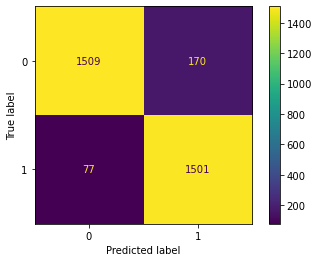

In [51]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1679
           1       0.90      0.95      0.92      1578

    accuracy                           0.92      3257
   macro avg       0.92      0.92      0.92      3257
weighted avg       0.93      0.92      0.92      3257



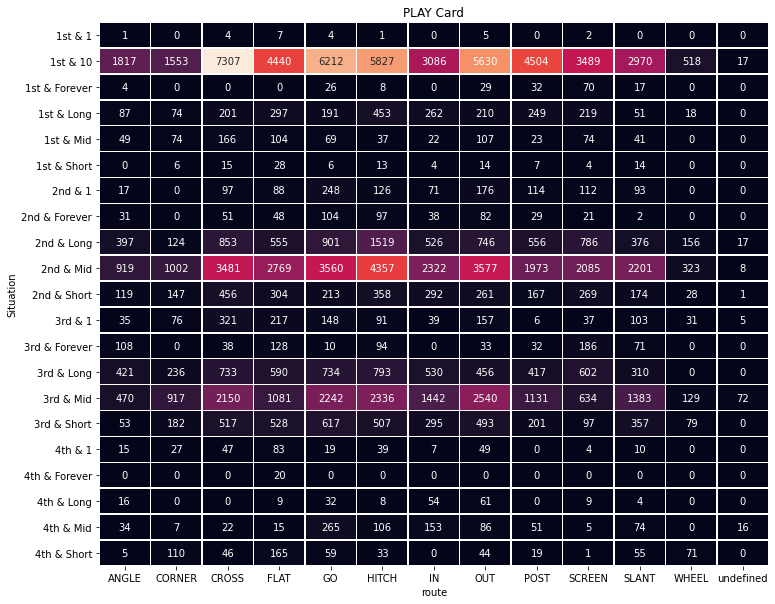

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.pivot_table(pass_caught, 
               index='Situation',
               columns='route', 
               values = 'playResult',
               aggfunc=sum,
               fill_value=0),
            annot=True,
            linewidths=.5,
            fmt="d",
            cbar=False)
plt.yticks(rotation = 360)
plt.title("PLAY Card")
plt.show()

In [54]:
pass_caught.head()

,quarter,down,yardsToGo,possessionTeam,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,homeTeamAbbr,visitorTeamAbbr,week,playDirection,route,player,Situation,PlaySuccess,playResult
0,1,1,15,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,C,PHI,ATL,1,left,HITCH,J.Jones,1st & Long,Success,10
8,1,1,10,ATL,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,I,PHI,ATL,1,left,HITCH,C.Ridley,1st & 10,Failure,0
11,1,2,10,ATL,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,I,PHI,ATL,1,left,SCREEN,D.Freeman,2nd & Mid,Failure,0
14,1,3,10,ATL,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,C,PHI,ATL,1,left,CORNER,J.Jones,3rd & Mid,Success,33
17,1,3,1,ATL,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,I,PHI,ATL,1,left,OUT,D.Freeman,3rd & 1,Failure,0


## Probabilities to construct play card

In [55]:
situation = []
route = []
prob = []


for i in (pass_caught.route.unique()):
    for j in sorted(list(pass_caught.Situation.unique())):
        situation.append(j)
        route.append(i)
        prob.append(round((pass_caught.loc[(pass_caught['Situation'] == j) & (pass_caught['PlaySuccess'] == 'Success') & (pass_caught['route'] == i),'playResult'].sum())/(pass_caught.loc[pass_caught['Situation'] == j,'playResult'].sum()),4))

card = pd.DataFrame({
    "Situation": situation,
    "Route": route,
    "Probability": prob
})
card = card[card['Route'] != 'undefined']

In [56]:
card.groupby(['Situation','Route']).max().sort_values(['Situation','Probability'],ascending=False)

Probability
Situation     Route              
4th & Short   FLAT         0.2697
              CORNER       0.1743
              WHEEL        0.1168
              GO           0.0970
              SLANT        0.0905
              CROSS        0.0658
              OUT          0.0641
              HITCH        0.0493
              POST         0.0312
              ANGLE        0.0082
              IN           0.0000
              SCREEN       0.0000
4th & Mid     GO           0.3177
              IN           0.1763
              HITCH        0.1115
              SLANT        0.0803
              OUT          0.0719
              POST         0.0528
              ANGLE        0.0372
              FLAT         0.0180
              CROSS        0.0132
              CORNER       0.0000
              SCREEN       0.0000
              WHEEL        0.0000
4th & Long    IN           0.2798
              OUT          0.2591
              GO           0.1658
              ANGLE        0.0000
              CORNER       0.0000
              CROSS        0.0000
              FLAT         0.0000
              HITCH        0.0000
              POST         0.0000
              SCREEN       0.0000
              SLANT        0.0000
              WHEEL        0.0000
4th & Forever ANGLE        0.0000
              CORNER       0.0000
              CROSS        0.0000
              FLAT         0.0000
              GO           0.0000
              HITCH        0.0000
              IN           0.0000
              OUT          0.0000
              POST         0.0000
              SCREEN       0.0000
              SLANT        0.0000
              WHEEL        0.0000
4th & 1       FLAT         0.2633
              OUT          0.1600
              CROSS        0.1533
              HITCH        0.1267
              CORNER       0.0900
              GO           0.0633
              ANGLE        0.0500
              SLANT        0.0300
              IN           0.0200
              SCREEN       0.0100
              POST         0.0000
              WHEEL        0.0000
3rd & Short   GO           0.1572
              FLAT         0.1386
              CROSS        0.1347
              HITCH        0.1337
              OUT          0.1256
              SLANT        0.0909
              IN           0.0751
              POST         0.0512
              CORNER       0.0464
              SCREEN       0.0285
              WHEEL        0.0201
              ANGLE        0.0135
3rd & Mid     OUT          0.1529
              HITCH        0.1408
              GO           0.1357
              CROSS        0.1268
              IN           0.0865
              SLANT        0.0830
              POST         0.0684
              FLAT         0.0656
              CORNER       0.0555
              SCREEN       0.0377
              ANGLE        0.0265
              WHEEL        0.0076
3rd & Long    GO           0.1261
              HITCH        0.0788
              IN           0.0771
              CROSS        0.0733
              POST         0.0716
              OUT          0.0522
              CORNER       0.0405
              SCREEN       0.0364
              ANGLE        0.0297
              FLAT         0.0215
              SLANT        0.0199
              WHEEL        0.0000
3rd & Forever POST         0.0457
              ANGLE        0.0000
              CORNER       0.0000
              CROSS        0.0000
              FLAT         0.0000
              GO           0.0000
              HITCH        0.0000
              IN           0.0000
              OUT          0.0000
              SCREEN       0.0000
              SLANT        0.0000
              WHEEL        0.0000
3rd & 1       CROSS        0.2583
              FLAT         0.1706
              OUT          0.1193
              GO           0.1153
              SLANT        0.0798
              HITCH        0.0719
              CORNER       0.0592
              IN           0.0300
          